In [6]:
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

Critical Value: 5.991464547107979


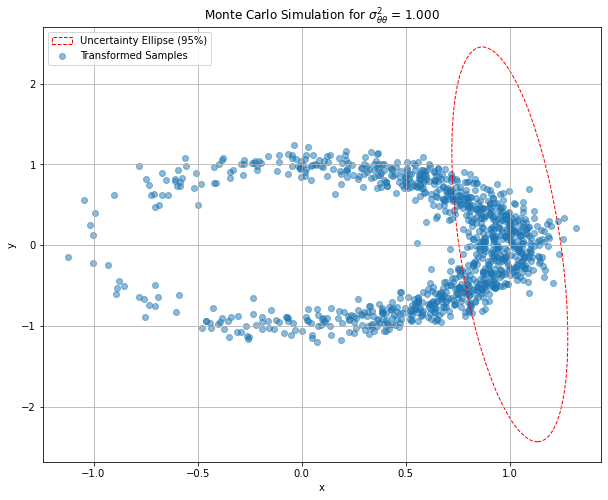

In [32]:
# Parameters
rho = 1.0  # meters
theta = np.deg2rad(0.5)  # degrees to radians
var_theta_theta = 1.0 # varience -- only change this parameter to produces the results

# Covariance matrix of x
Sigma_x = np.array([[0.01, 0.0], [0.0, var_theta_theta]])

# Jacobian matrix
J = np.array([[np.cos(theta), -rho * np.sin(theta)],
              [np.sin(theta), rho * np.cos(theta)]])

# Covariance matrix of y
Sigma_y = J @ Sigma_x @ J.T

# Generate random samples of x
mean_x = np.array([rho * np.cos(theta), rho * np.sin(theta)])
samples = np.random.multivariate_normal(mean_x, Sigma_x, size=1000)

# Convert polar coordinates to Cartesian coordinates
samples_cartesian = np.column_stack((samples[:, 0] * np.cos(samples[:, 1]),
                                     samples[:, 0] * np.sin(samples[:, 1])))

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))

# Plot transformed results
ax.scatter(samples_cartesian[:, 0], samples_cartesian[:, 1], alpha=0.5, label='Transformed Samples')


# Compute uncertainty ellipse parameters
eigenvalues, eigenvectors = np.linalg.eig(Sigma_y)
angle=np.arctan2(eigenvectors[0][1],eigenvectors[0][0])

confidence_level = 0.95
critical_value = chi2.ppf(confidence_level, df=2)
print("Critical Value:", critical_value)


width = 2 * np.sqrt(critical_value * eigenvalues[0])
height = 2 * np.sqrt(critical_value * eigenvalues[1])

# Create and add the uncertainty ellipse to the plot
ellipse = Ellipse(mean_x, width=width, height=height, angle=angle, 
                  fill=False, color='r', linestyle='--', label=f'Uncertainty Ellipse ({int(confidence_level*100)}%)')
ax.add_patch(ellipse)

# Set x-y axis settings
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True)

# Set plot title
ax.set_title(f'Monte Carlo Simulation for $\\sigma^2_{{\\theta\\theta}}$ = {var_theta_theta:.3f}')


# Add legend to plot
plt.legend()

# Show the plot
plt.show()